In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("resources/dataset.csv")
print(df.head())
print(len(df))

    IDfg          Name  Age   PA    H  HR    R  RBI  SB   BB  ...   wOBA  \
0  13611  Mookie Betts   25  614  180  32  129   80  30   81  ...  0.449   
1  10155    Mike Trout   26  608  147  39  101   79  24  122  ...  0.447   
2  11579  Bryce Harper   22  654  172  42  118   99   6  124  ...  0.461   
3  10155    Mike Trout   23  682  172  41  104   90  11   92  ...  0.415   
4  15640   Aaron Judge   25  678  154  52  128  114   9  127  ...  0.430   

    WAR  BABIP    LD%    GB%  Contact%  SwStr%  Barrel%    EV  maxEV  
0  10.4  0.368  0.212  0.339     0.859   0.050    0.131  92.3  110.6  
1   9.5  0.346  0.234  0.313     0.841   0.060    0.153  91.2  118.0  
2   9.3  0.369  0.222  0.385     0.754   0.108    0.122  91.4  116.0  
3   9.3  0.344  0.244  0.372     0.800   0.075    0.161  92.9  117.7  
4   8.7  0.357  0.219  0.349     0.676   0.133    0.249  94.9  121.1  

[5 rows x 25 columns]
4280


<Axes: >

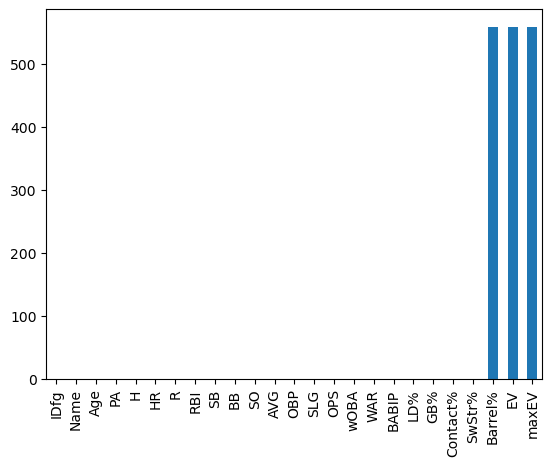

In [54]:
df.isna().sum().plot.bar()

In [55]:
df.drop(["IDfg","Name"],axis=1,inplace=True)
print(df.isna().sum())
df.drop(["Barrel%","EV","maxEV"],axis=1,inplace=True)

Age           0
PA            0
H             0
HR            0
R             0
RBI           0
SB            0
BB            0
SO            0
AVG           0
OBP           0
SLG           0
OPS           0
wOBA          0
WAR           0
BABIP         0
LD%           0
GB%           0
Contact%      0
SwStr%        0
Barrel%     559
EV          559
maxEV       559
dtype: int64


In [56]:

# X = df.drop("H",axis=1)
# Y = df['H'].values

In [57]:
X = df[["PA","AVG","BABIP","BB","OBP"]]
Y = df['H'].values

In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,HistGradientBoostingRegressor
from xgboost import XGBRegressor

In [59]:
trainX, testX, trainY,testY = train_test_split(X,Y,random_state=42,test_size=0.3)

In [60]:
features_scaler = MinMaxScaler()
targetScaler = StandardScaler()
# trainX = features_scaler.fit_transform(trainX)
# testX = features_scaler.transform(testX)

# trainY = targetScaler.fit_transform(trainY.reshape(-1,1))
# testY = targetScaler.transform(testY.reshape(-1,1))


In [61]:
models = [RandomForestRegressor(n_jobs=-1,random_state=42),SVR(),MLPRegressor(max_iter=1000),XGBRegressor(),AdaBoostRegressor(),HistGradientBoostingRegressor(),LinearRegression()]
for m in models:
    print(m)
    m.fit(trainX,trainY.ravel())
    pred = m.predict(testX)
    r2 = r2_score(testY.ravel(),pred)
    print(r2)
    print("------")

RandomForestRegressor(n_jobs=-1, random_state=42)


0.997906627989209
------
SVR()
0.9576767791074223
------
MLPRegressor(max_iter=1000)
0.972715544887913
------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
0.9985996619014686
------
AdaBoostRegressor()
0.9840987775431601
------
HistGradientBoostingRegressor()
0.9987280043210832
------
LinearRegression()
0.980606442

In [62]:
#model = RandomForestRegressor(n_jobs=-1,random_state=42)
model = RandomForestRegressor()
model.fit(trainX,trainY.ravel())
pred = model.predict(testX)
r2 = r2_score(testY.ravel(),pred)
print(r2)


0.9979268605309399


In [63]:
important_features = model.feature_importances_

<Axes: >

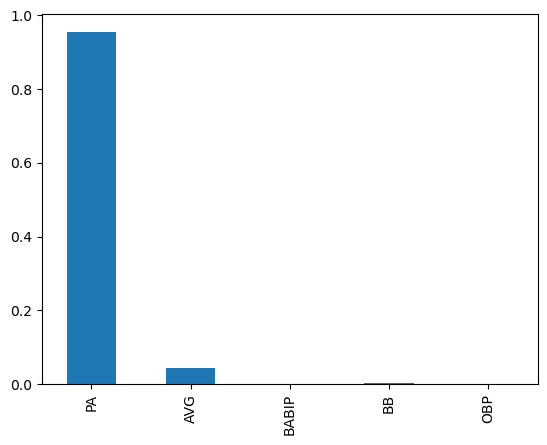

In [64]:
feature_names = []
forest_importances = pd.Series(important_features,index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar()

1.NaN

In [65]:
forest_importances.sort_values(ascending=False)

PA       0.954849
AVG      0.042191
BB       0.001591
OBP      0.000870
BABIP    0.000500
dtype: float64

In [66]:
len(forest_importances)

5